In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 데이터 압축 풀기
cd '/content/drive/MyDrive/2021년 2학기/HAICon2021'

SyntaxError: ignored

In [8]:
!unzip -qq "/content/drive/MyDrive/2021년 2학기/HAICon2021/235757_HAICon2021_dataset.zip"

replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [9]:
ls

 235757_HAICon2021_dataset.zip     sample_submission.csv   validation/
 eTaPR-21.8.2-py3-none-any.whl     test/
'HAICon::EDA 데이터 순서와 분포'   train/


In [14]:
cd '/content/drive/MyDrive/2021년 2학기/HAICon2021/validation'

/content/drive/MyDrive/2021년 2학기/HAICon2021/validation


In [15]:
cd ..

validation.csv


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

train_files = glob('/content/drive/MyDrive/2021년 2학기/HAICon2021/train/*.csv')
valid_files = glob('/content/drive/MyDrive/2021년 2학기/HAICon2021/validation/*.csv')
test_files  = glob('/content/drive/MyDrive/2021년 2학기/HAICon2021/test/*.csv')

df_trains = [pd.read_csv(file) for file in train_files]
df_valids = [pd.read_csv(file) for file in valid_files]
df_tests  = [pd.read_csv(file) for file in test_files]


In [31]:
for i,df in enumerate(df_valids):
  print(f"Valid #{i+1} | START:{df['timestamp'].min()}| END: {df['timestamp'].max()}|DATA POINT:{len(df)}")

for i,df in enumerate(df_trains[0:1]):
  print(f"Train #{i+1} | START:{df['timestamp'].min()}| END: {df['timestamp'].max()}|DATA POINT:{len(df)}") 

for i,df in enumerate(df_tests):
  print(f"Test  #{i+1} | START:{df['timestamp'].min()}| END: {df['timestamp'].max()}|DATA POINT:{len(df)}")

for i,df in enumerate(df_trains[1:]):
  print(f"Train #{i+1} | START:{df['timestamp'].min()}| END: {df['timestamp'].max()}|DATA POINT:{len(df)}")

Valid #1 | START:2021-07-10 00:00:01| END: 2021-07-11 00:00:00|DATA POINT:86400
Train #1 | START:2021-07-11 10:00:00| END: 2021-07-12 12:00:00|DATA POINT:93601
Test  #1 | START:2021-07-13 16:00:01| END: 2021-07-14 15:00:00|DATA POINT:82800
Test  #2 | START:2021-07-14 17:40:01| END: 2021-07-15 11:00:00|DATA POINT:62400
Test  #3 | START:2021-07-15 12:00:01| END: 2021-07-17 00:00:00|DATA POINT:129600
Train #1 | START:2021-07-17 00:00:01| END: 2021-07-19 08:00:00|DATA POINT:201600
Train #2 | START:2021-07-23 18:00:01| END: 2021-07-25 05:00:00|DATA POINT:126000
Train #3 | START:2021-07-26 12:00:00| END: 2021-07-27 12:00:00|DATA POINT:86401
Train #4 | START:2021-08-02 15:00:01| END: 2021-08-05 09:00:00|DATA POINT:237600
Train #5 | START:2021-08-06 09:00:01| END: 2021-08-09 09:00:00|DATA POINT:259200


In [32]:
def plot(column, s=10):
    plt.figure(figsize=(20, 4))
    plt.title(column)
    plt.scatter(pd.to_datetime(df_trains[0]['timestamp']), df_trains[0][column], color='k',       s=s, label='Train'  )
    plt.scatter(pd.to_datetime(df_trains[1]['timestamp']), df_trains[1][column], color='k',       s=s                 )
    plt.scatter(pd.to_datetime(df_trains[2]['timestamp']), df_trains[2][column], color='k',       s=s                 )
    plt.scatter(pd.to_datetime(df_trains[3]['timestamp']), df_trains[3][column], color='k',       s=s                 )
    plt.scatter(pd.to_datetime(df_trains[4]['timestamp']), df_trains[4][column], color='k',       s=s                 )
    plt.scatter(pd.to_datetime(df_trains[5]['timestamp']), df_trains[5][column], color='k',       s=s                 ) 
    plt.scatter(pd.to_datetime(df_valids[0]['timestamp']), df_valids[0][column], color='blue',    s=s, label='Valid'  )
    plt.scatter(pd.to_datetime(df_tests[0]['timestamp']),  df_tests[0][column],  color='r',       s=s, label='Test #1')
    plt.scatter(pd.to_datetime(df_tests[1]['timestamp']),  df_tests[1][column],  color='#E84A3B', s=s, label='Test #2')
    plt.scatter(pd.to_datetime(df_tests[2]['timestamp']),  df_tests[2][column],  color='#F49D81', s=s, label='Test #3')
    plt.legend(loc = 'upper right')
    plt.xlabel('Date')
    plt.show()

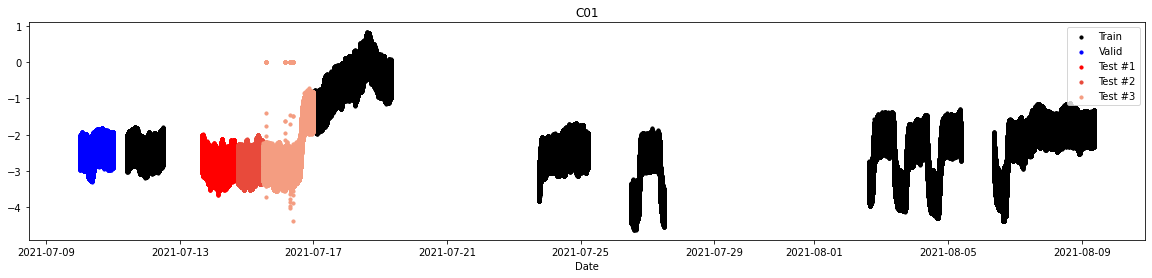

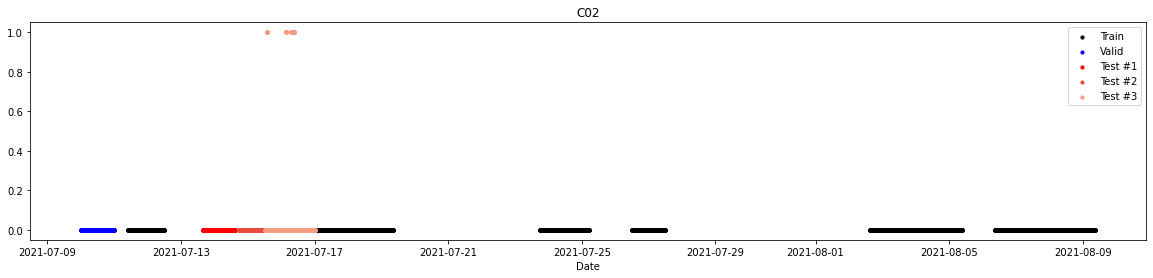

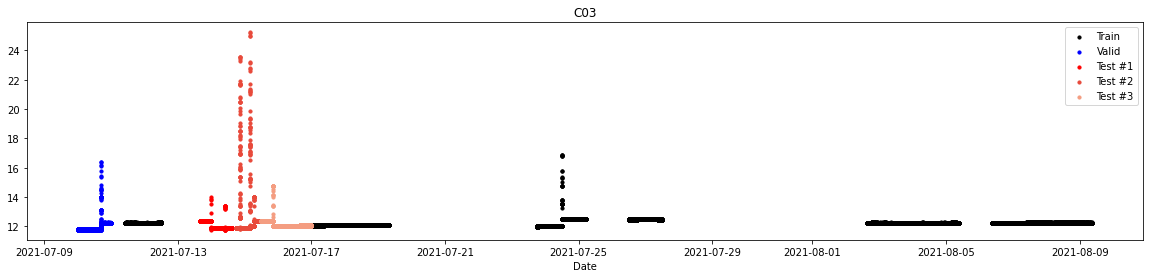

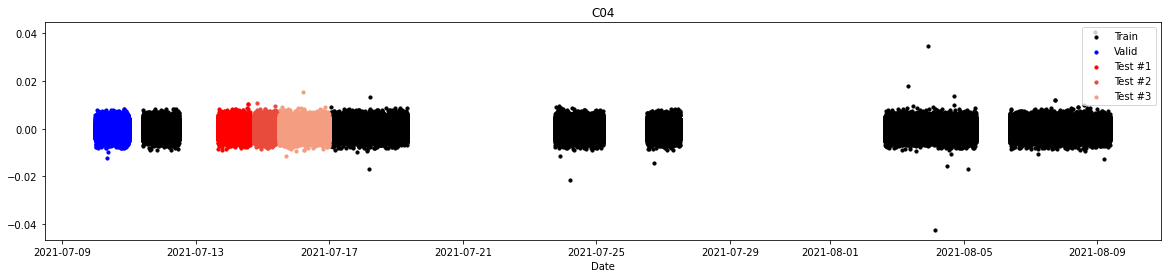

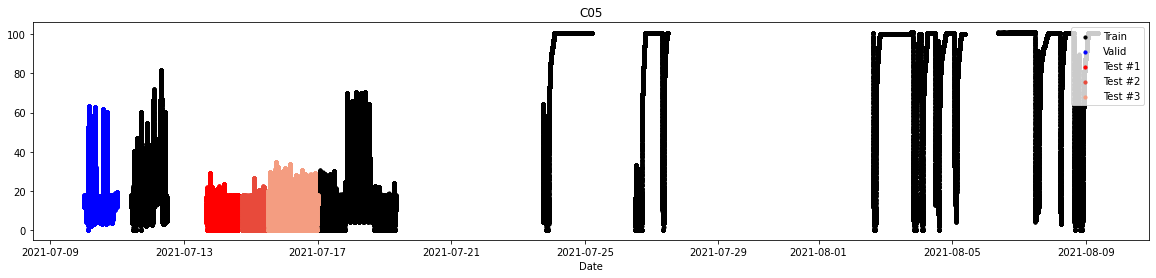

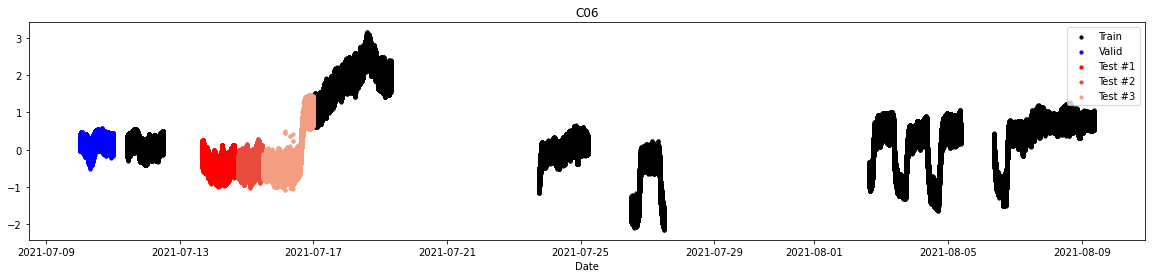

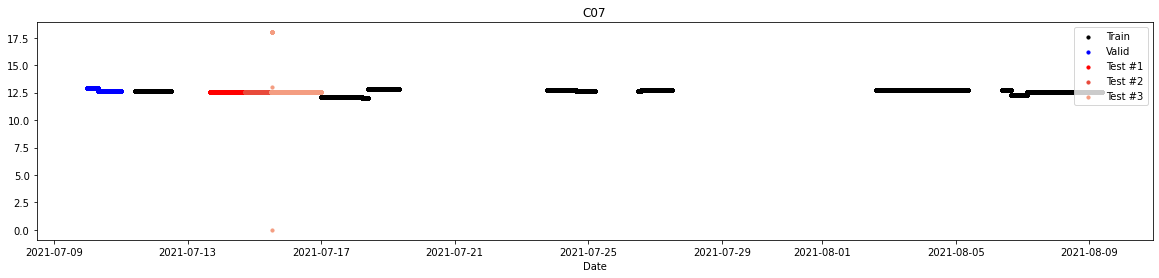

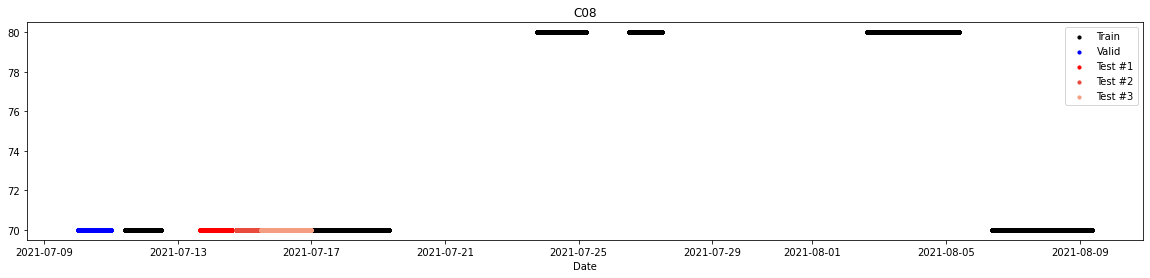

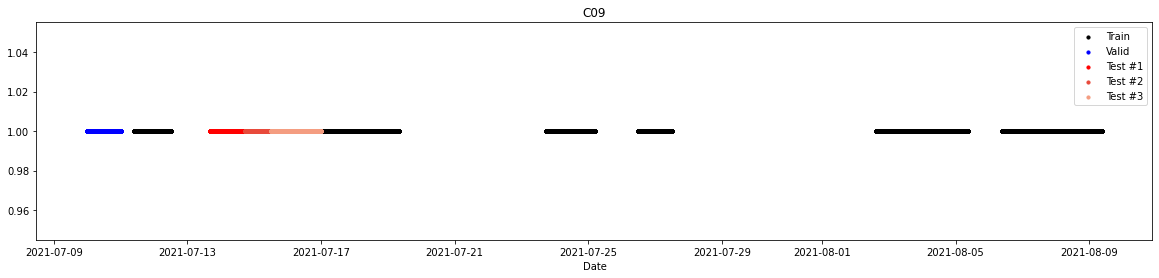

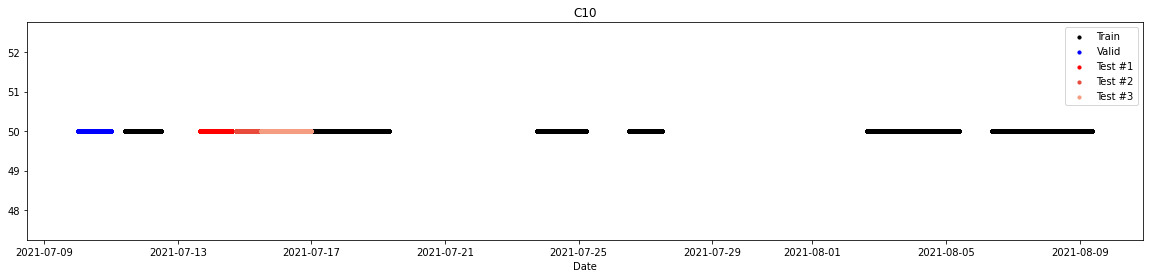

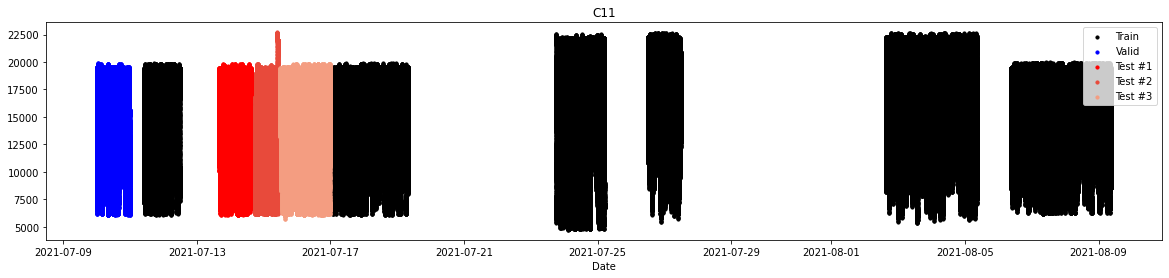

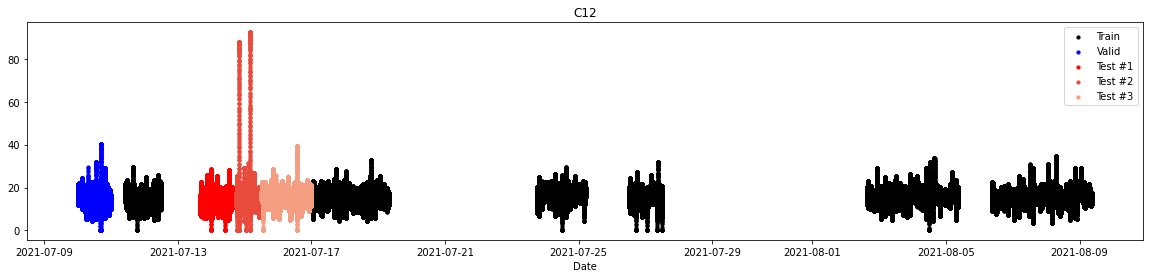

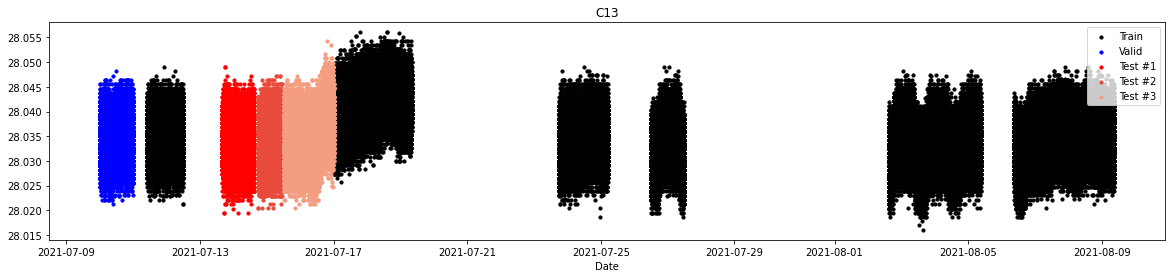

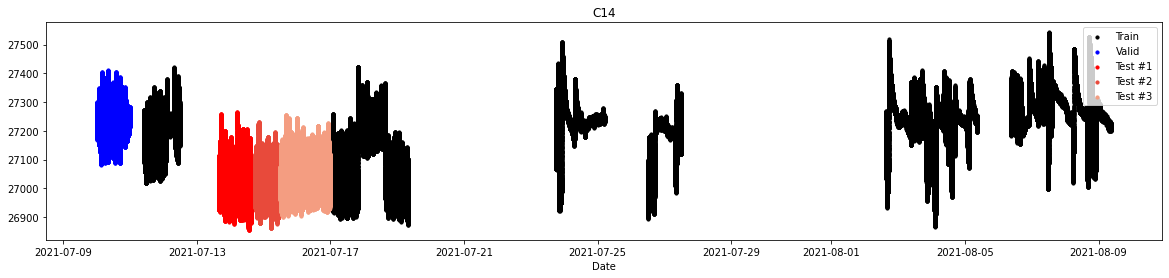

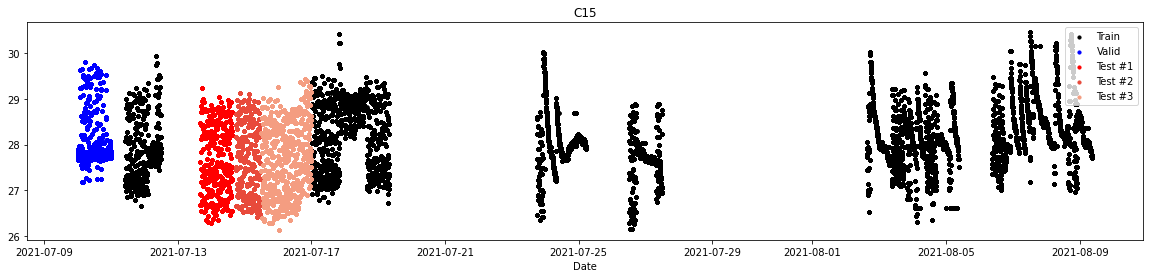

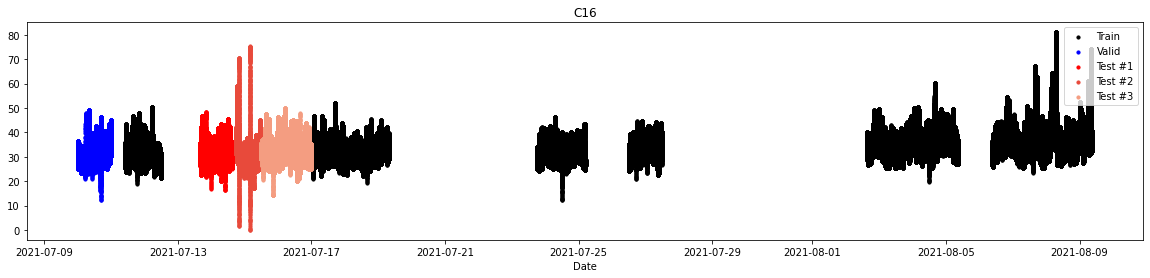

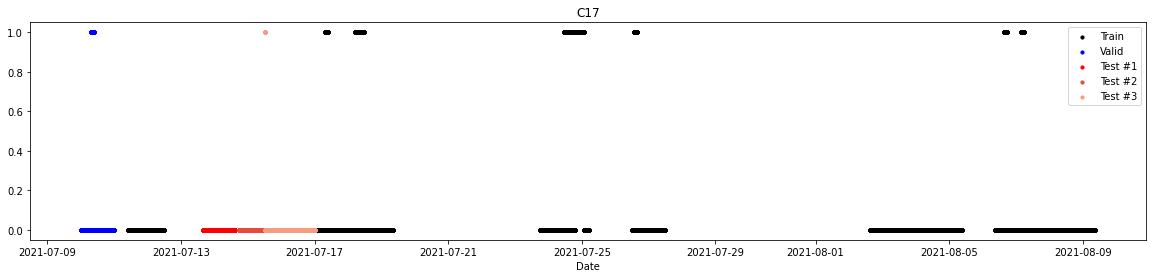

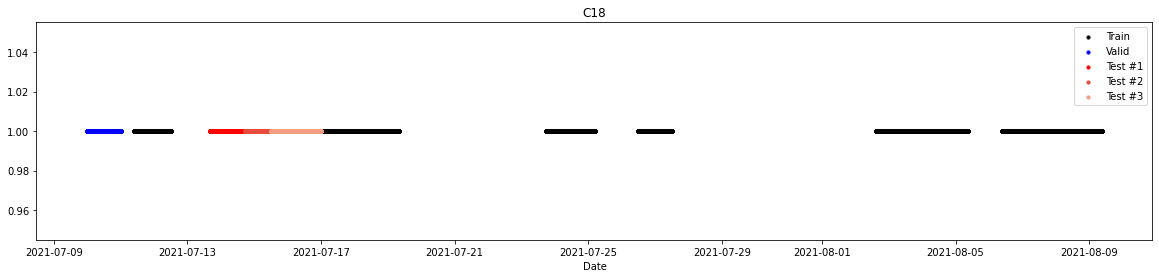

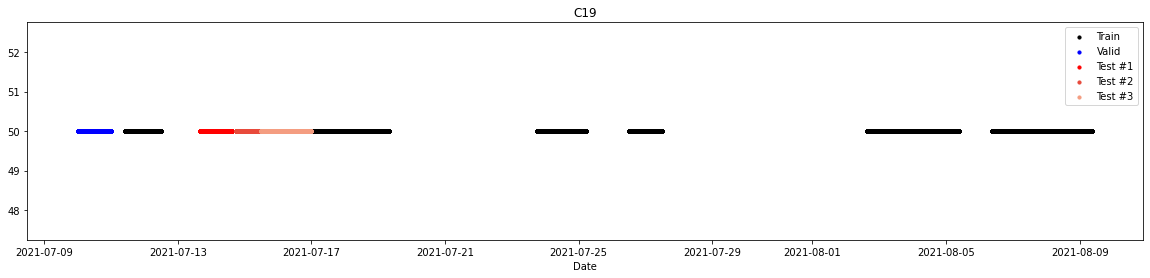

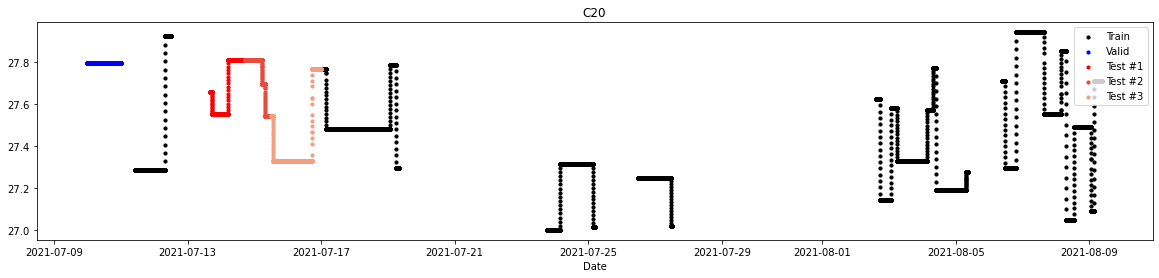

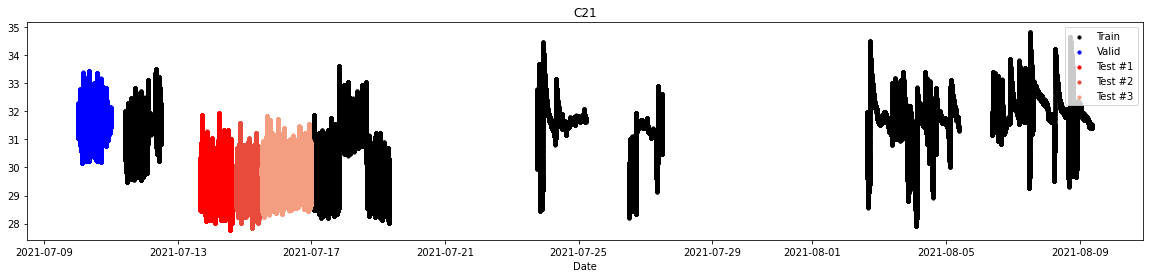

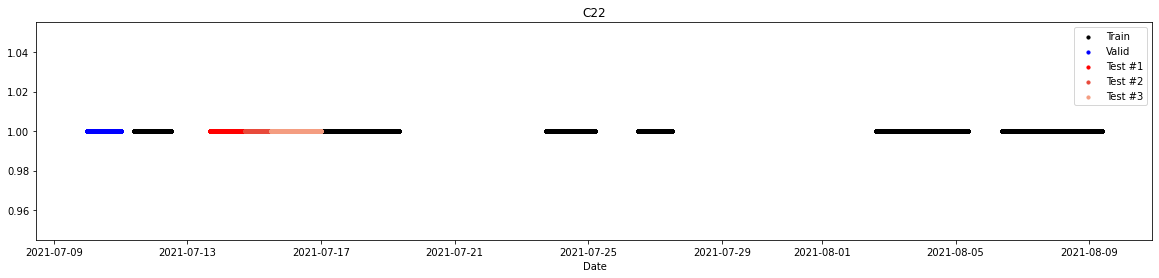

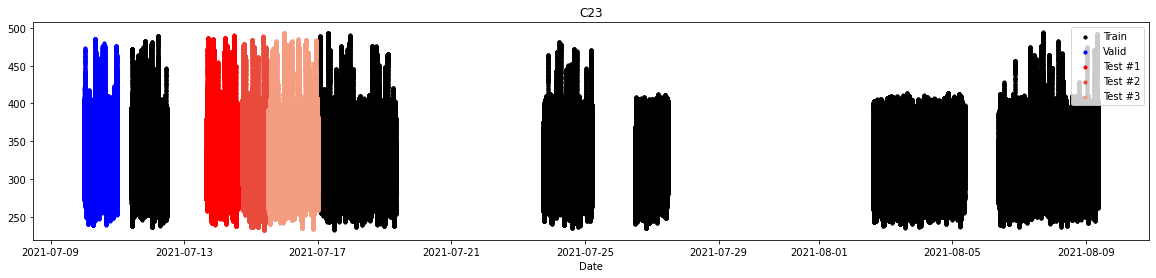

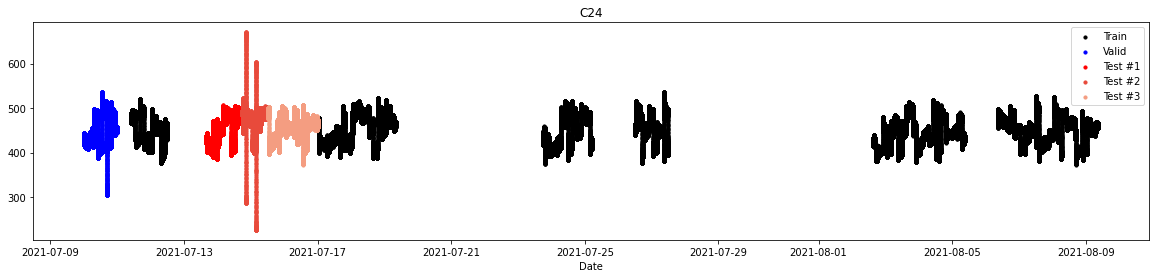

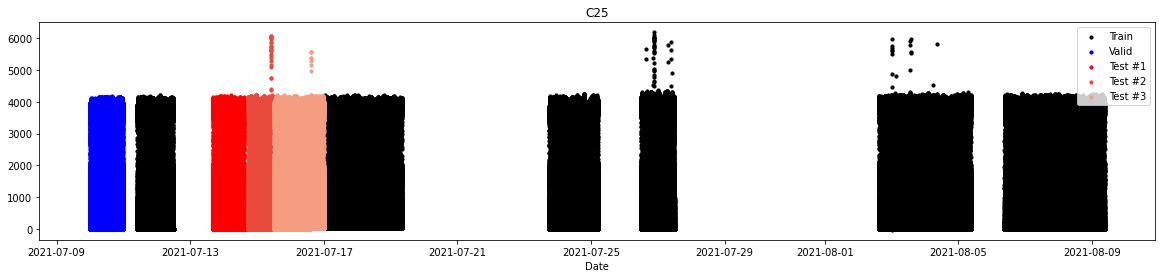

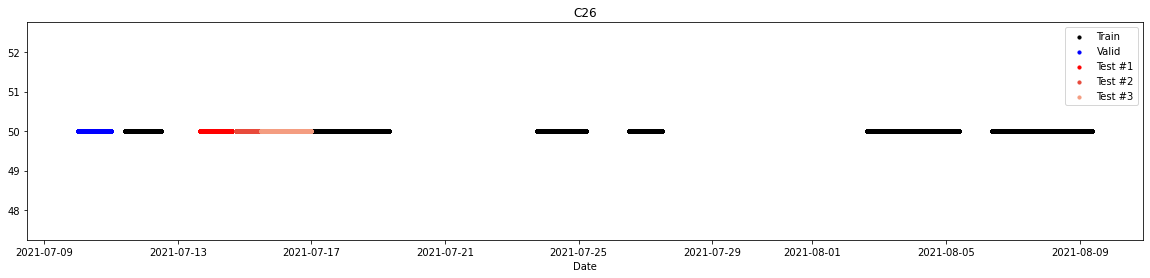

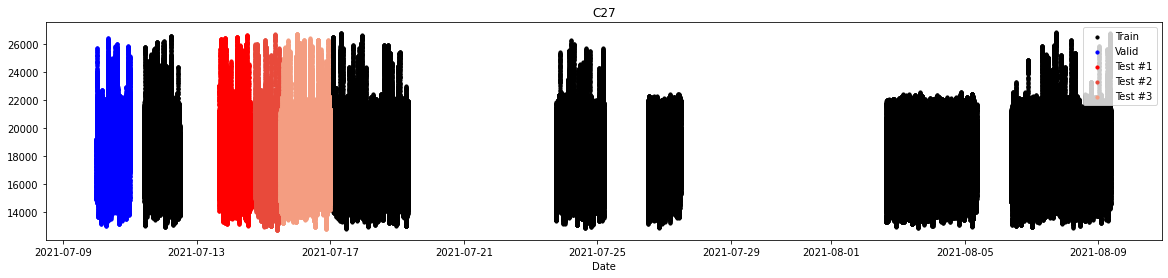

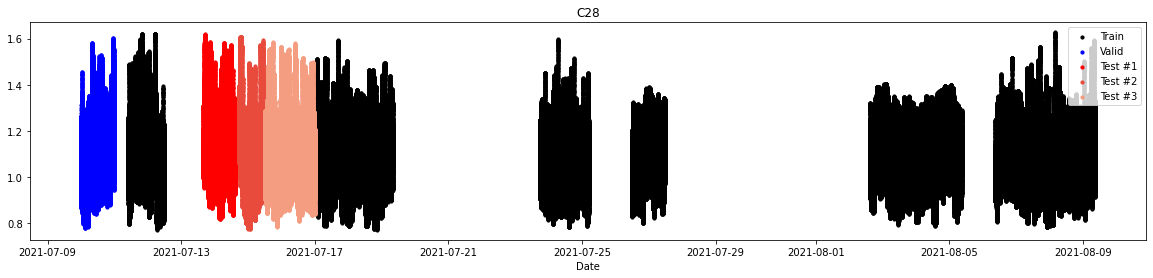

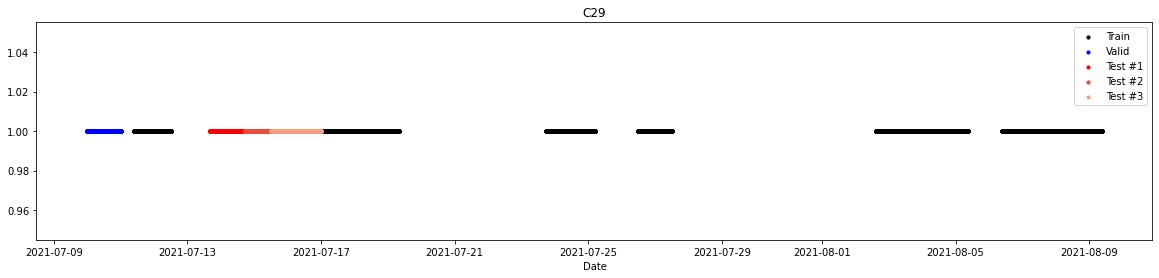

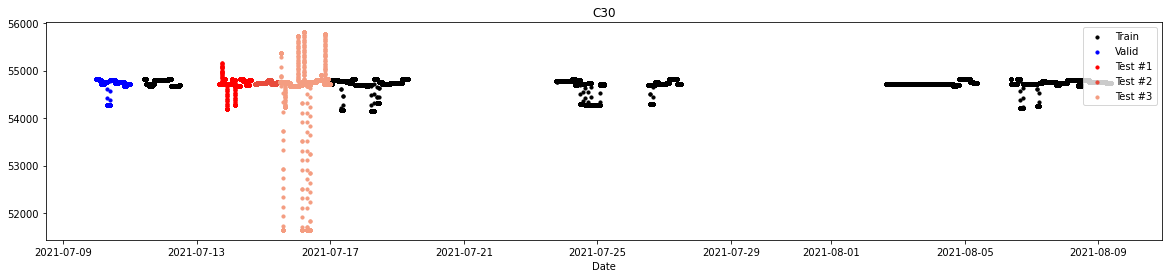

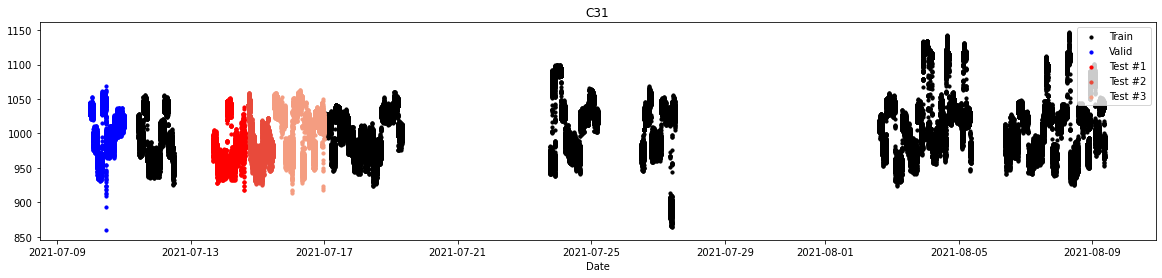

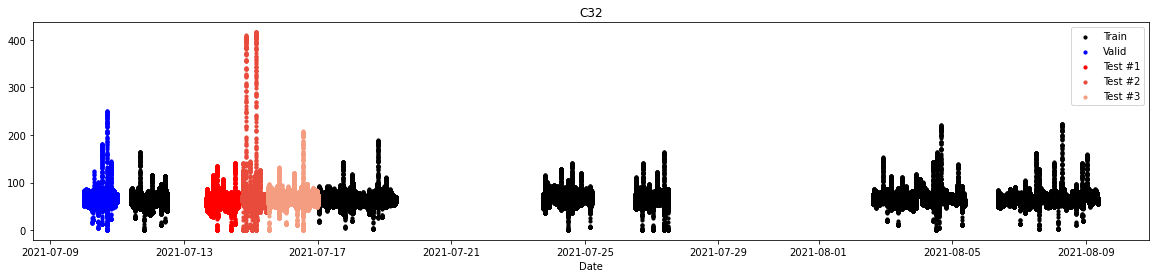

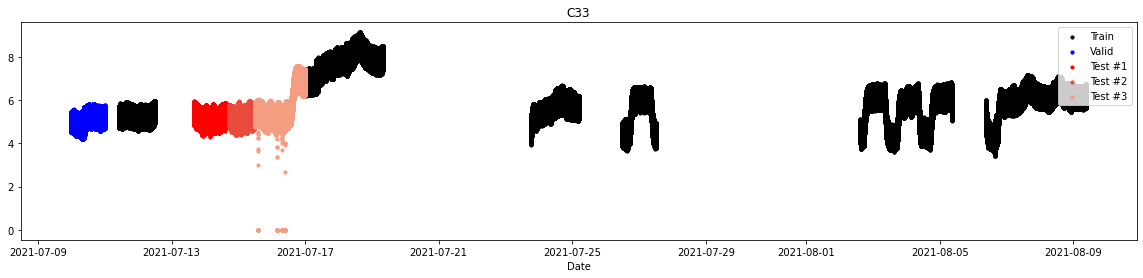

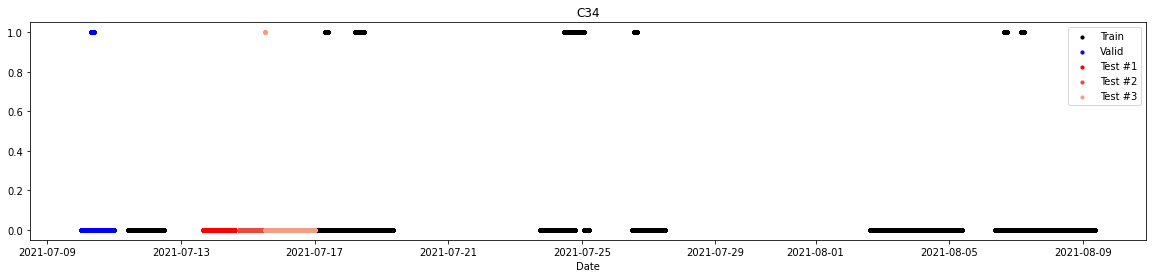

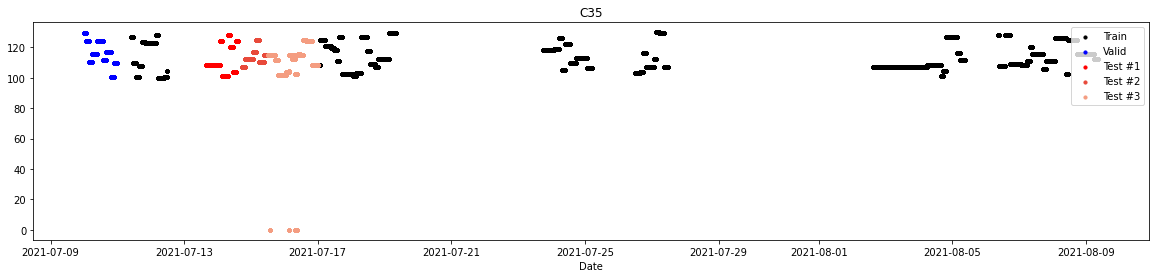

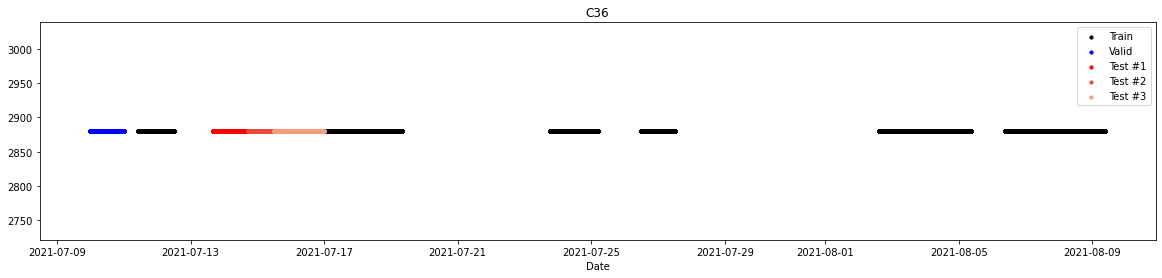

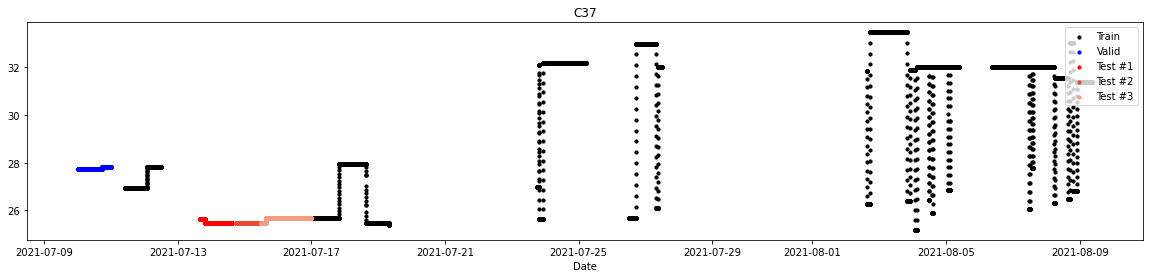

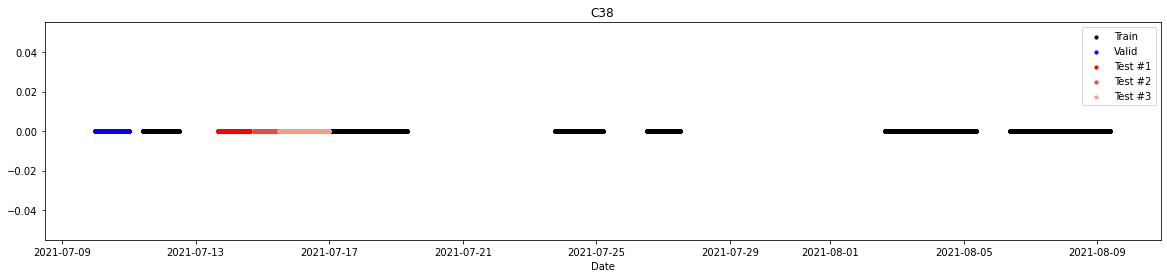

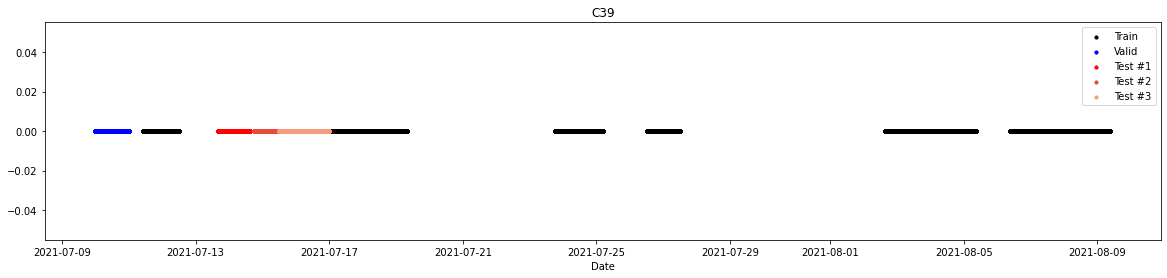

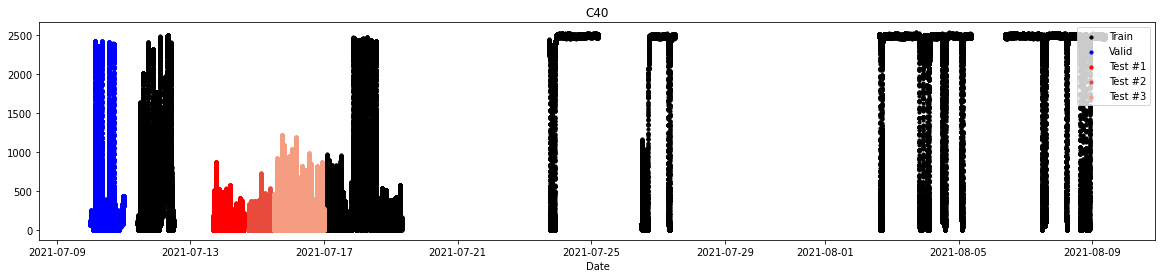

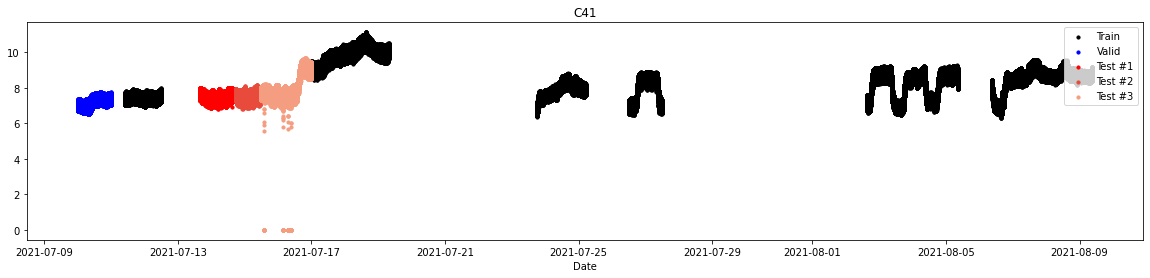

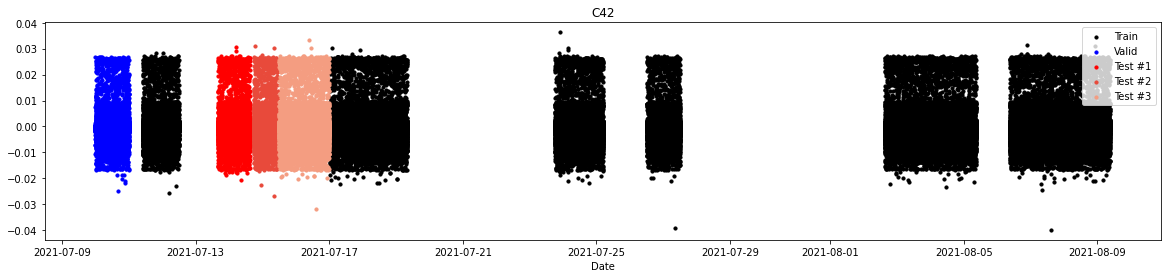

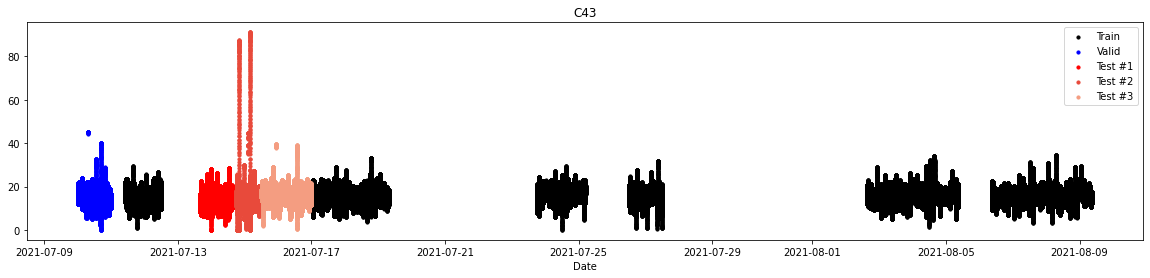

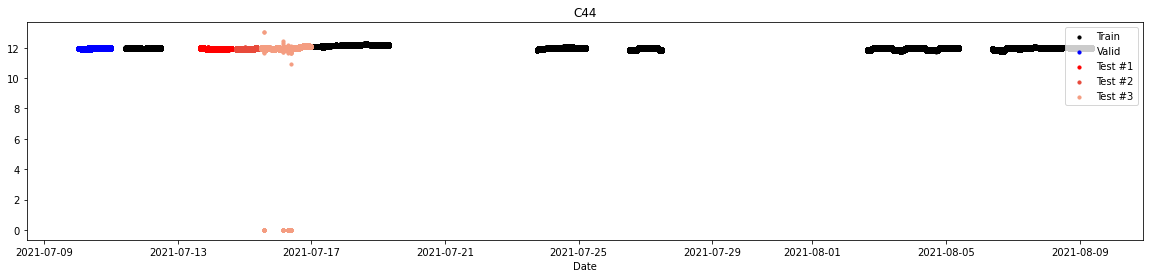

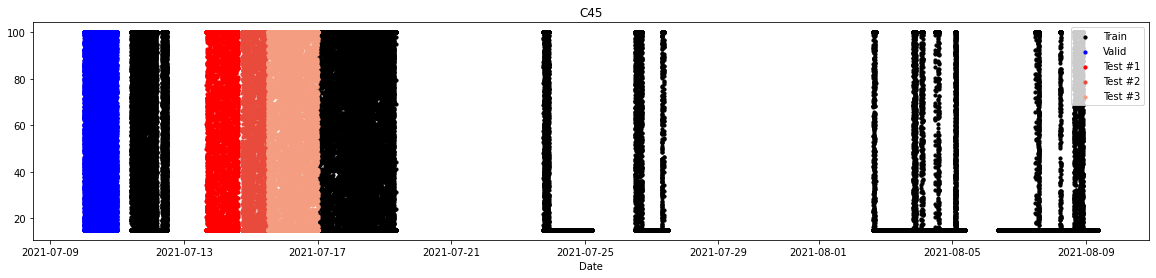

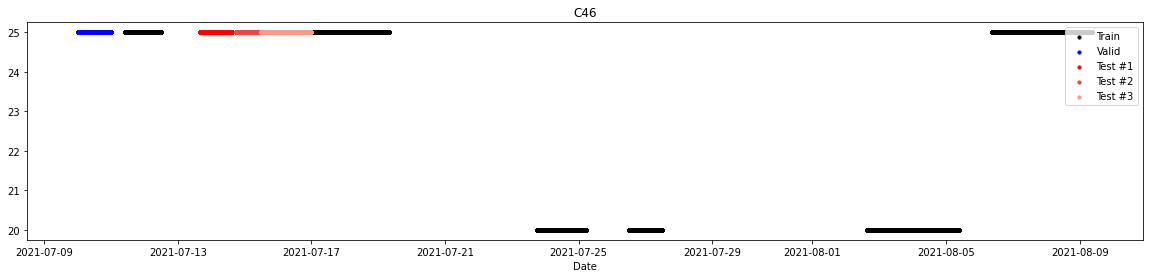

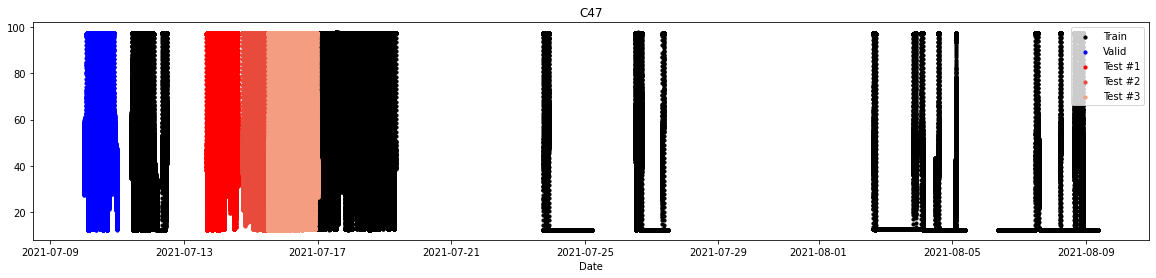

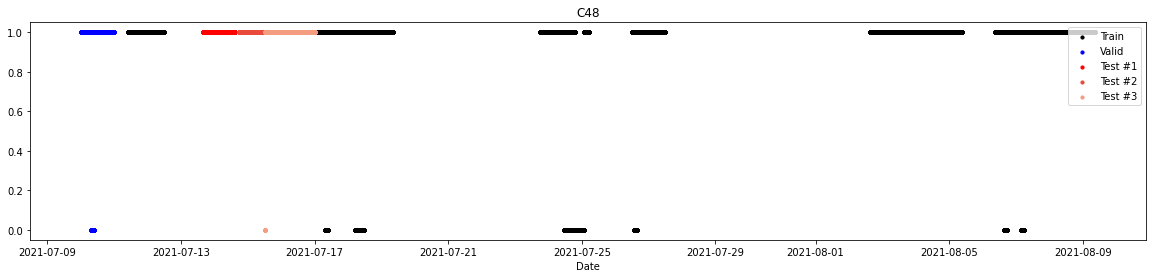

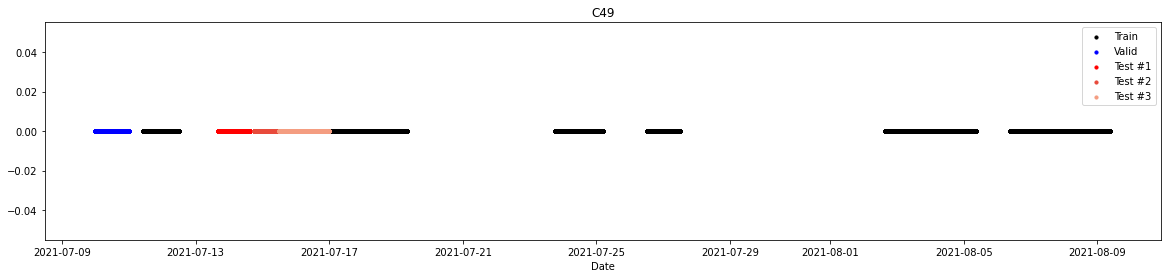

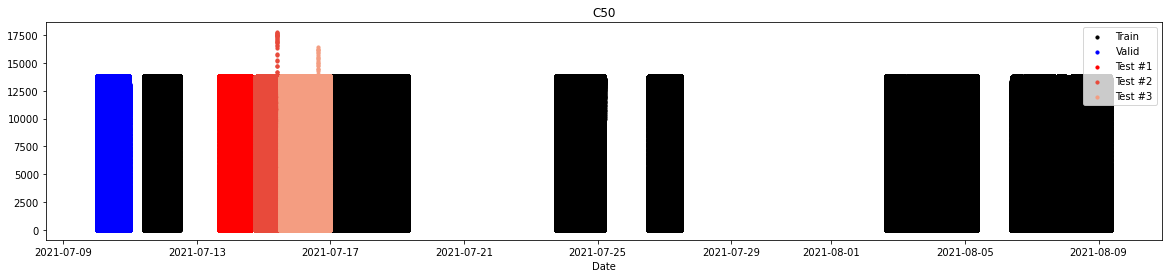

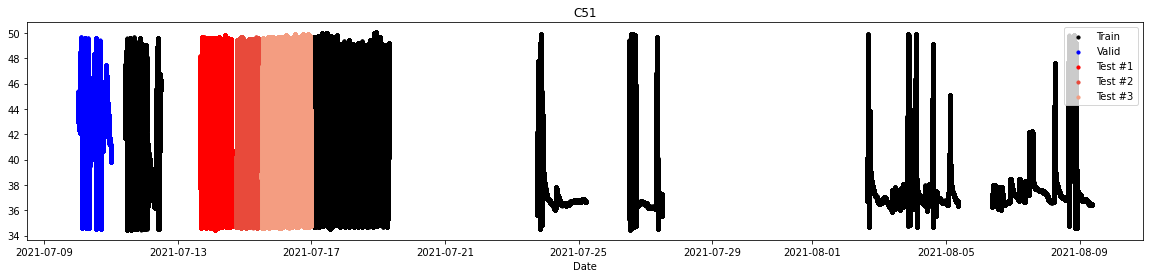

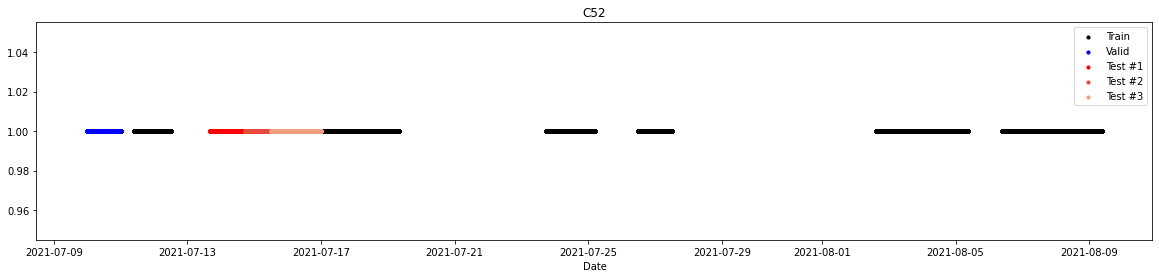

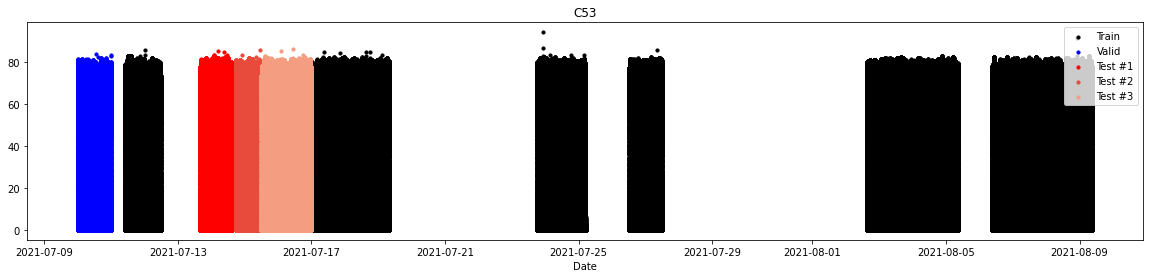

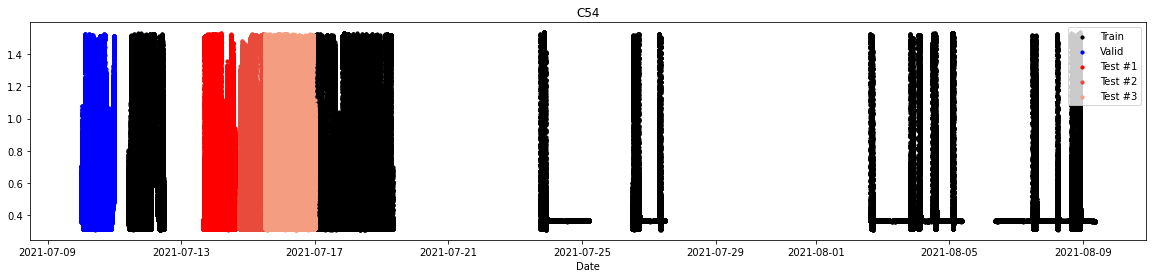

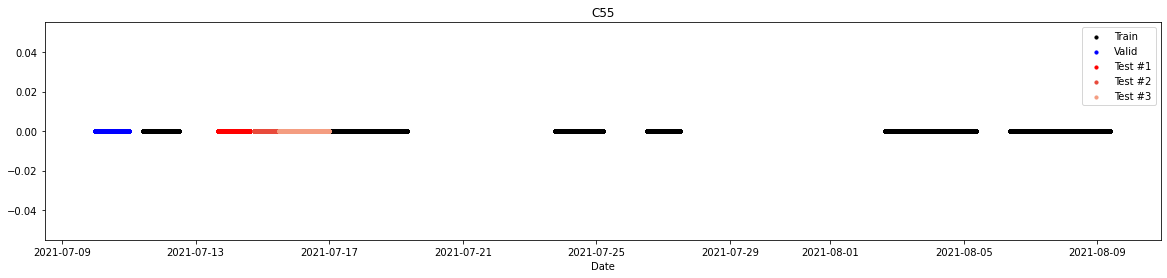

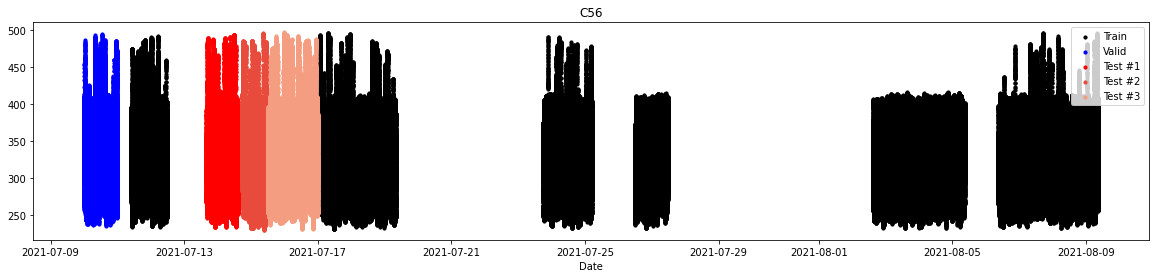

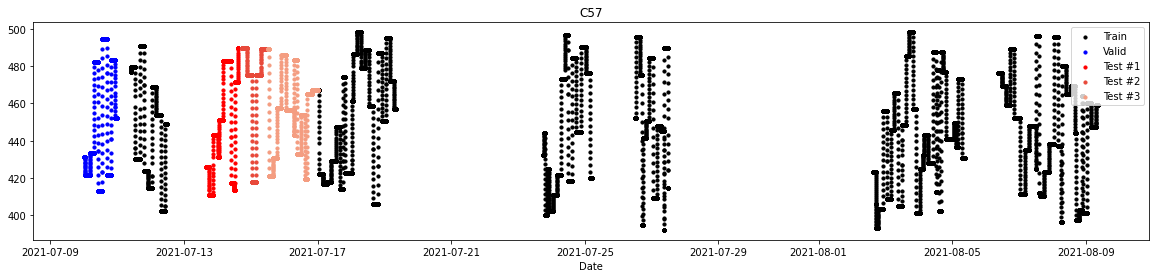

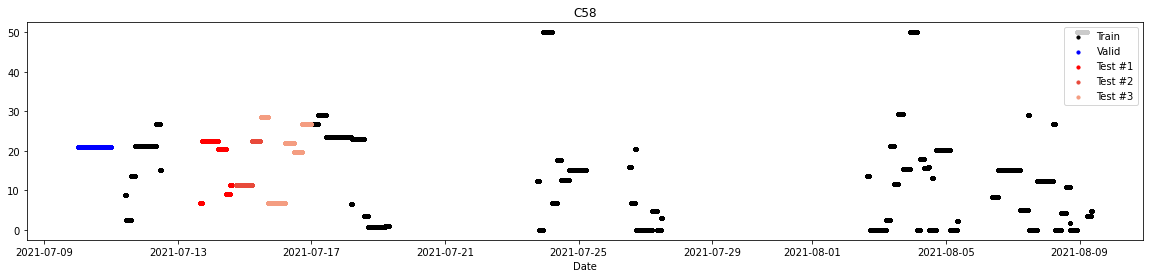

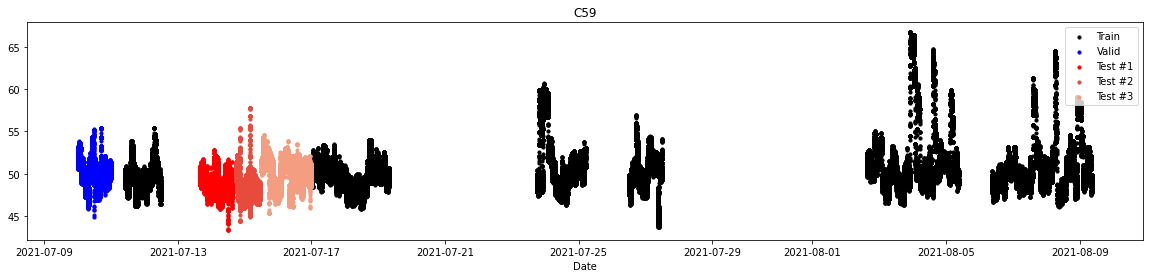

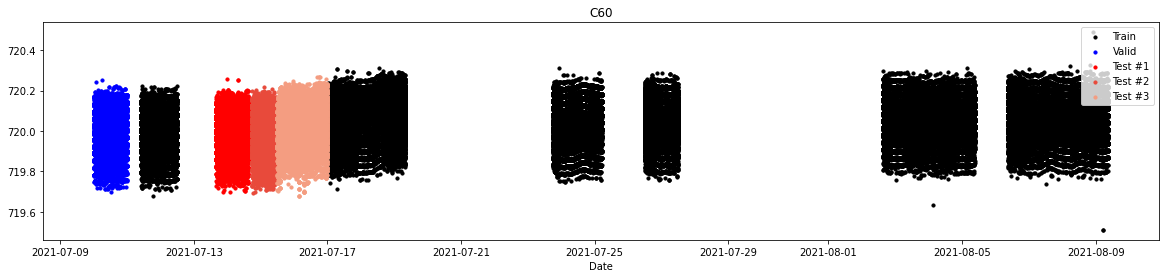

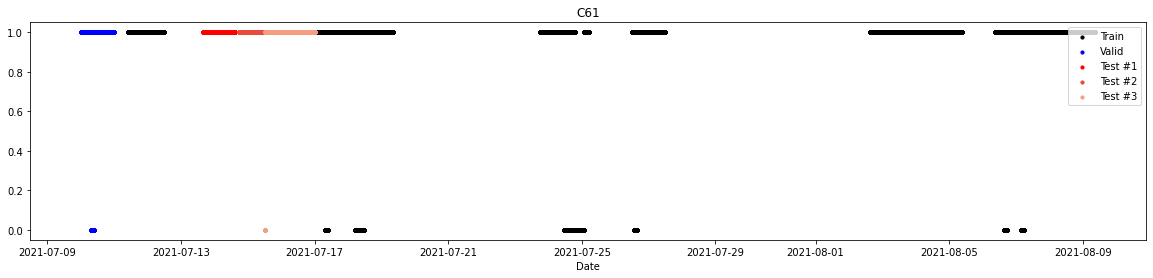

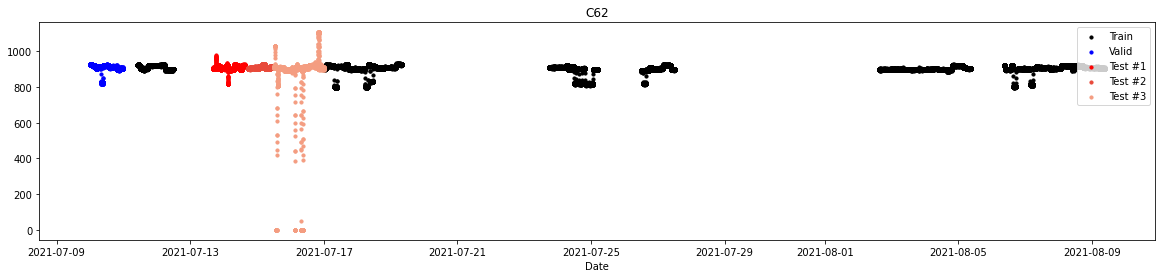

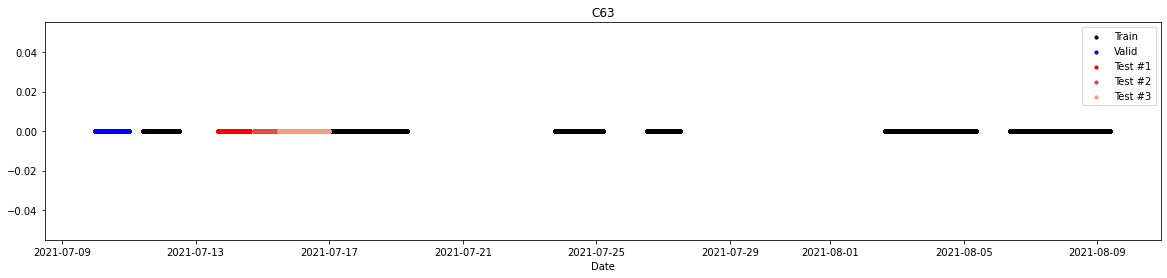

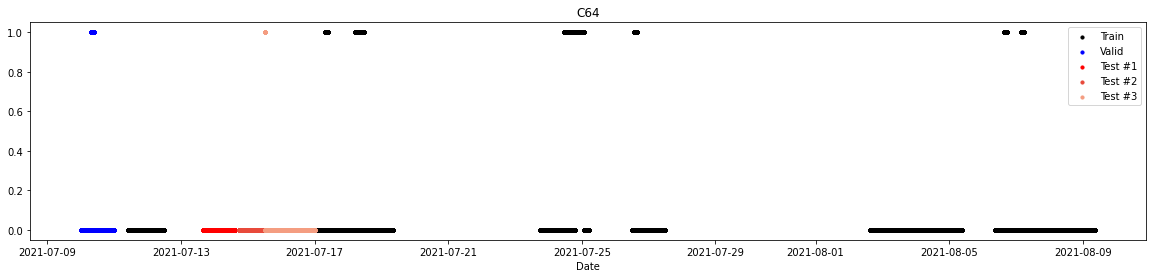

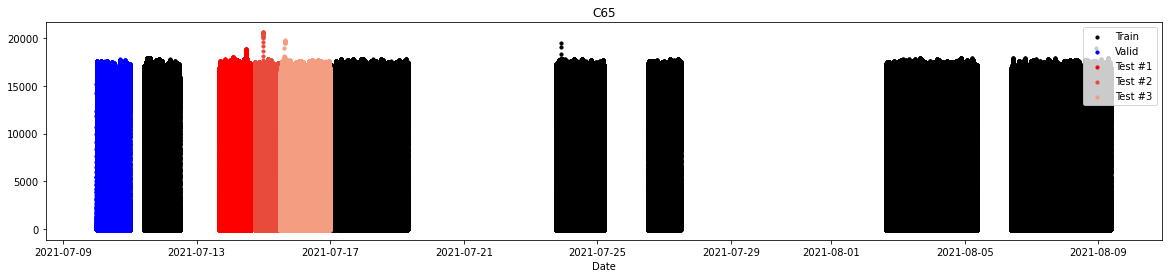

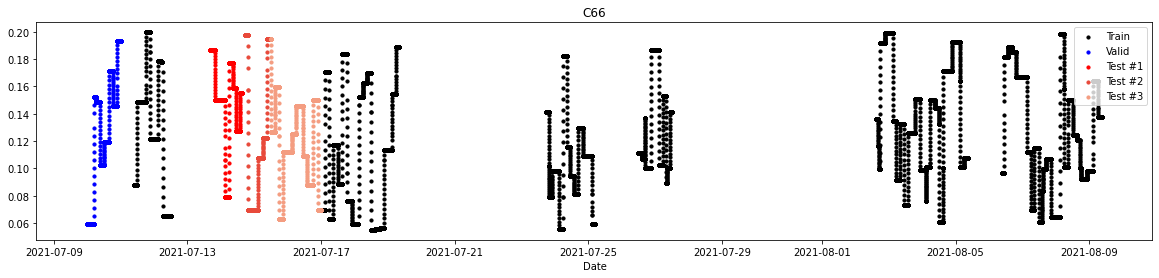

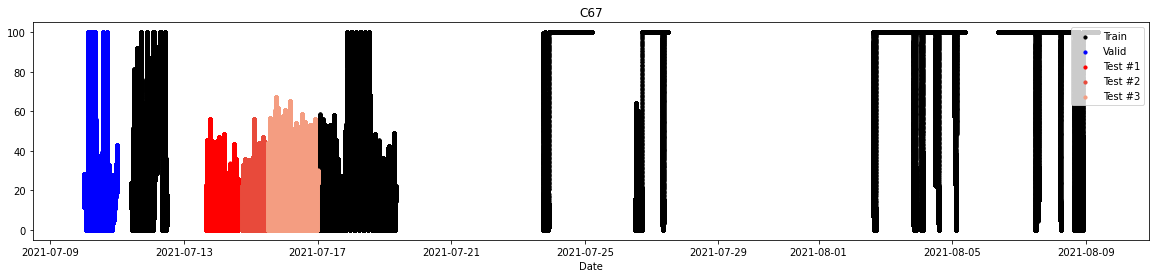

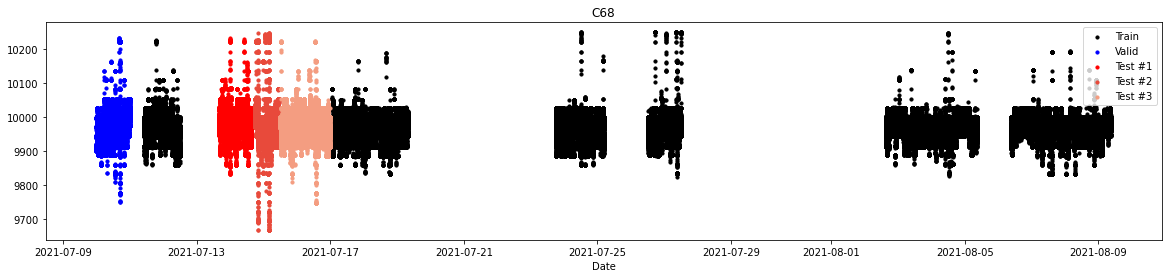

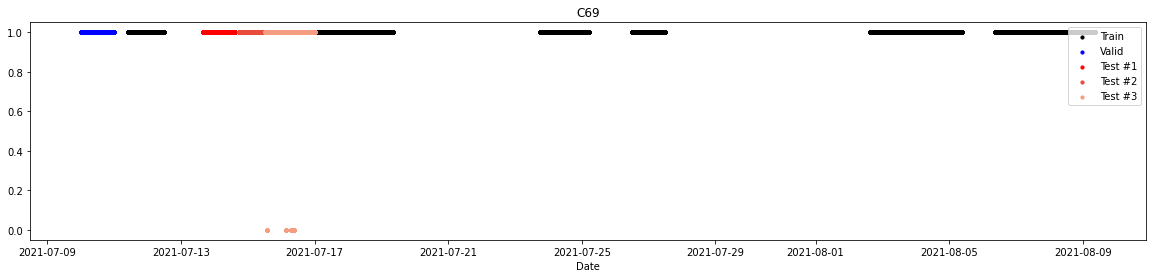

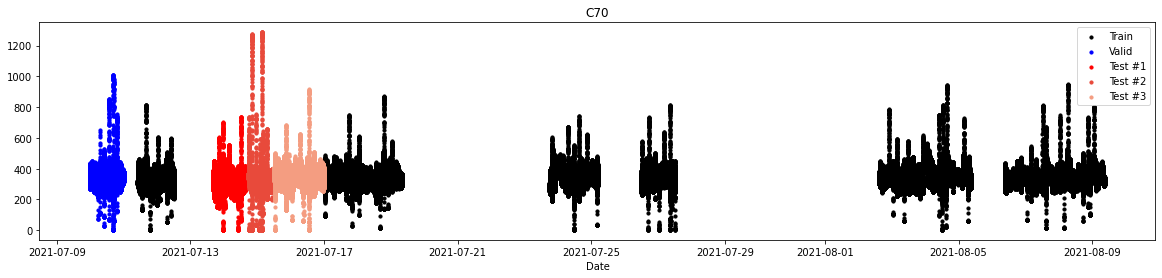

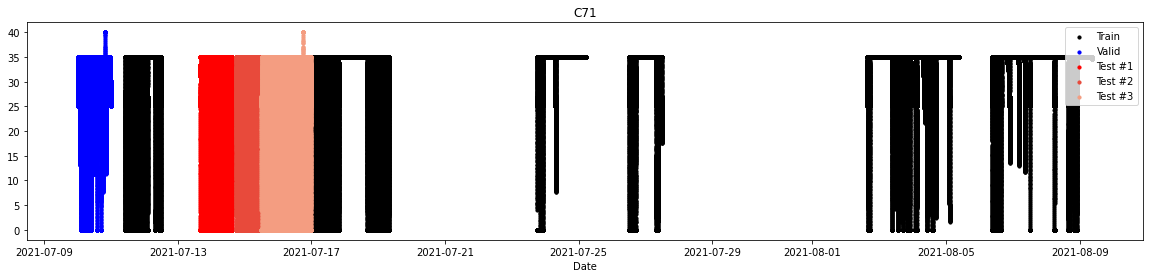

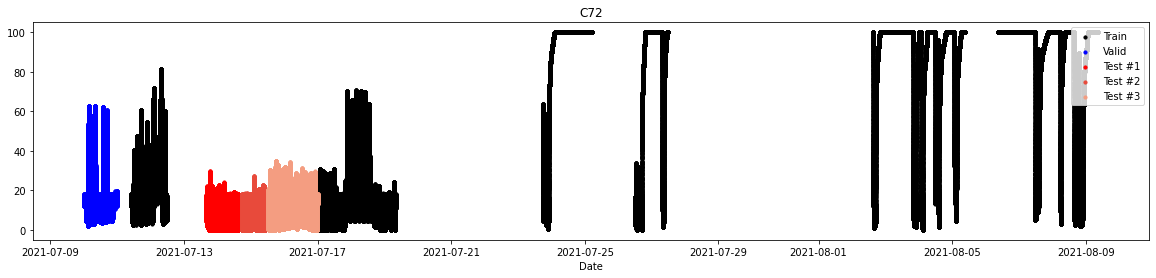

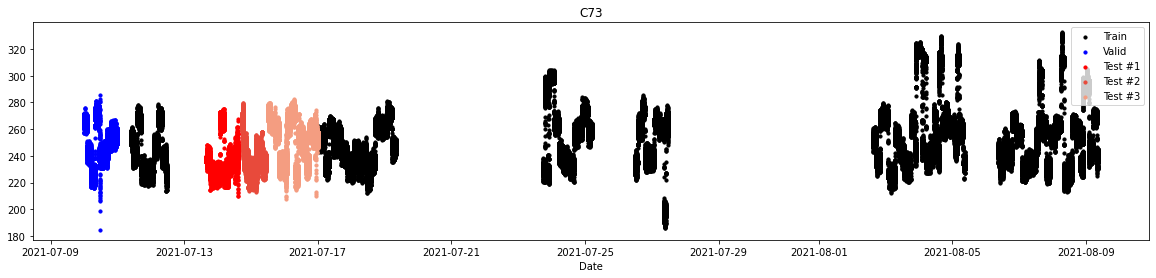

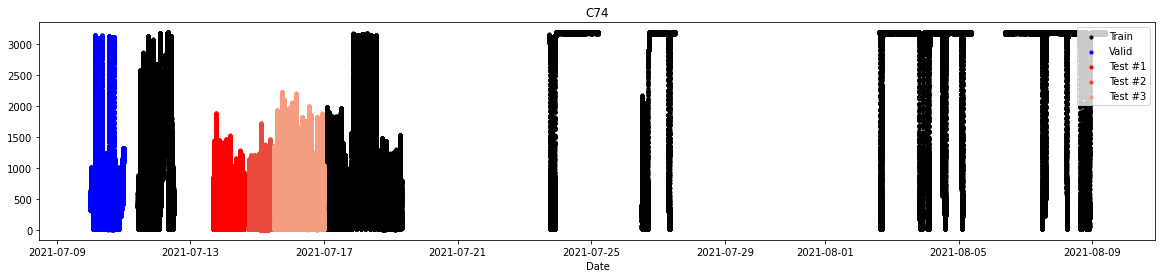

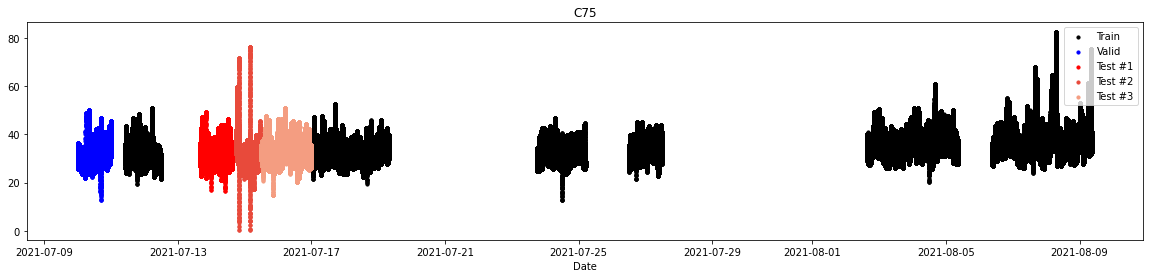

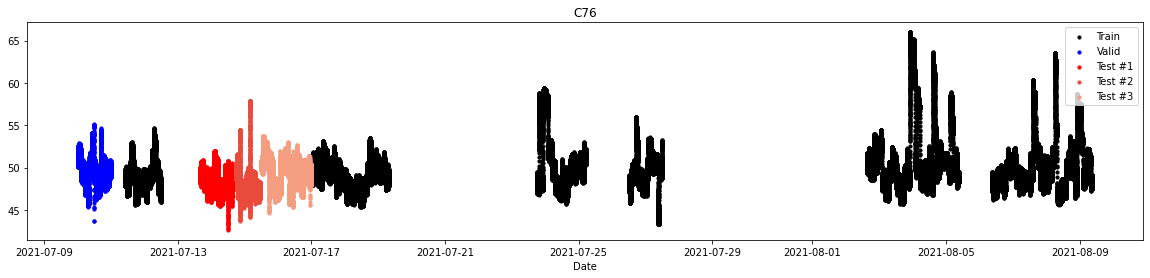

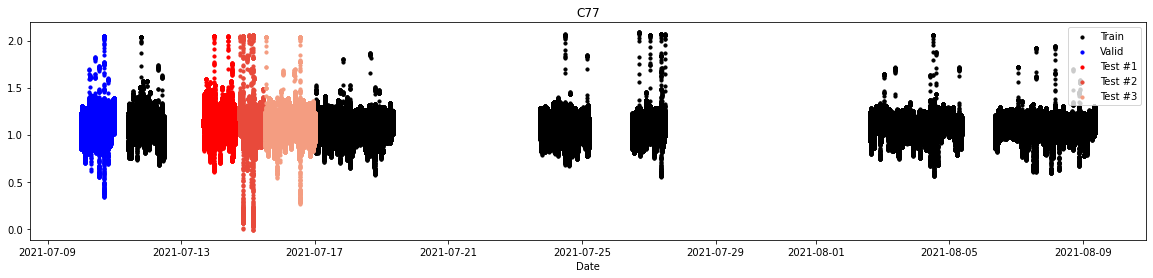

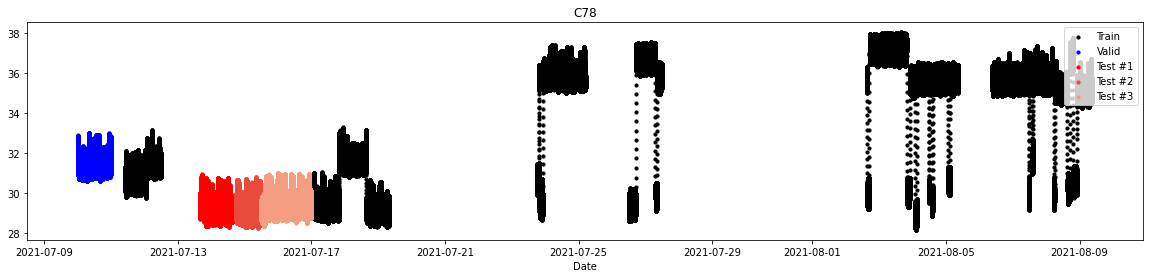

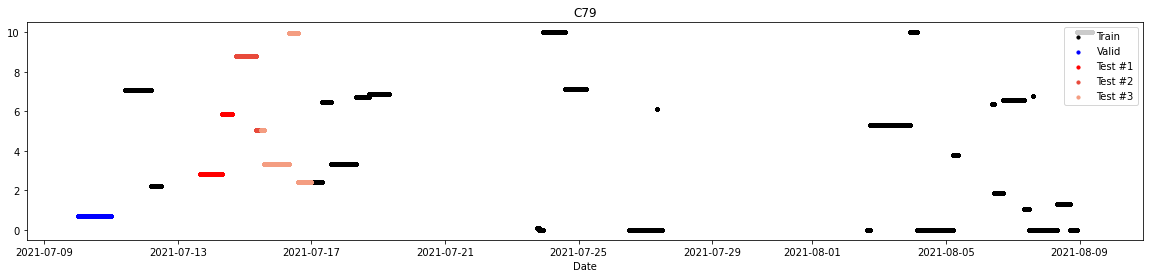

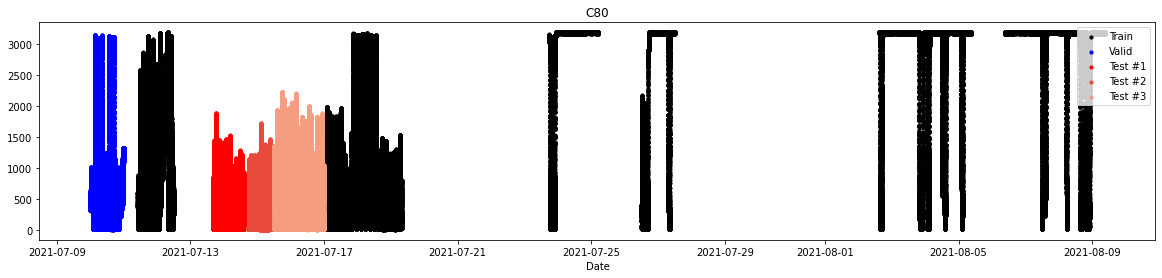

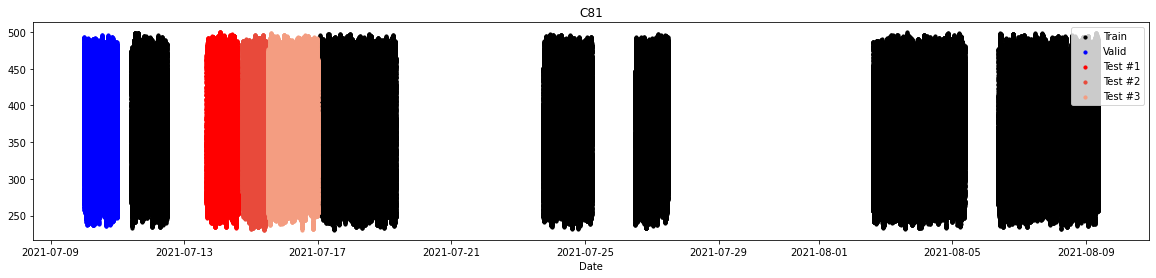

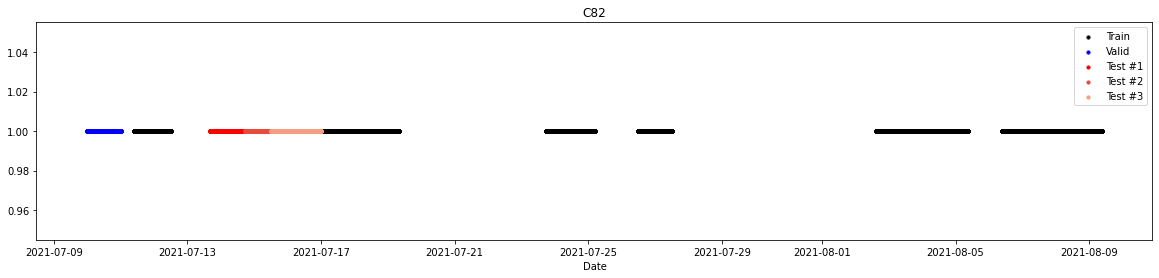

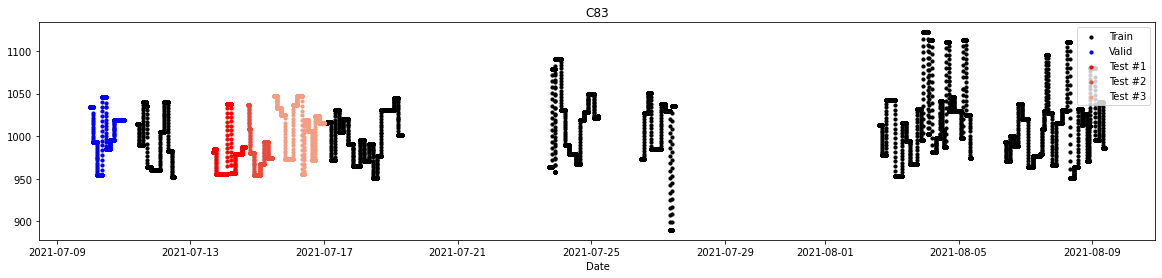

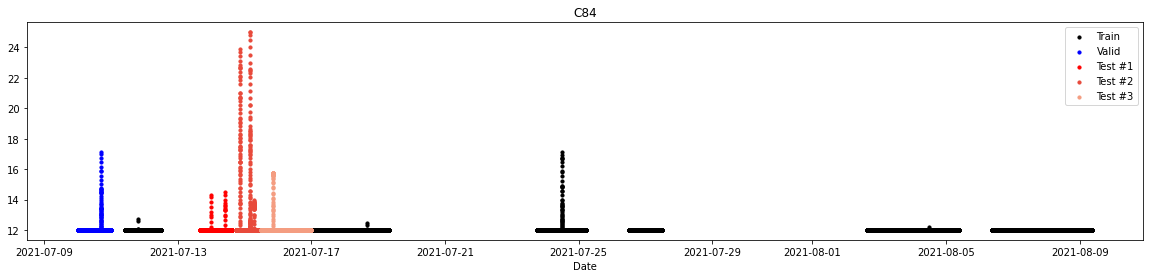

In [ ]:
columns = [f'C{str(i).zfill(2)}' for i in range(1, 87)]
for column in columns:
    plot(column)